In [1]:
from BayesNet import BayesNet
from BNReasoner import BNReasoner
import networkx as nx
import pandas as pd
import copy

In [2]:
#TD: If at some point you get a "omp Error #15," try running this code. It worked for me, but apparently it is not the best solution as it can cause problems, so use with "caution" I suppose 

import os 
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [3]:
covid = BayesNet()
covid.load_from_bifxml('testing/Use_Case.BIFXML')

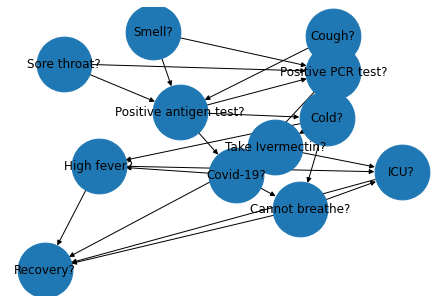

In [4]:
covid.draw_structure()

In [5]:
covid.get_all_variables()

['Cough?',
 'Smell?',
 'Sore throat?',
 'Positive PCR test?',
 'Positive antigen test?',
 'Covid-19?',
 'Cold?',
 'Cannot breathe?',
 'High fever?',
 'Take Ivermectin?',
 'ICU?',
 'Recovery?']

In [6]:
covid.get_all_cpts()

{'Cough?':    Cough?     p
 0   False  0.95
 1    True  0.05, 'Smell?':    Smell?     p
 0   False  0.02
 1    True  0.98, 'Sore throat?':    Sore throat?     p
 0         False  0.95
 1          True  0.05, 'Positive PCR test?':     Positive antigen test?  Sore throat?  Smell?  Cough?  Positive PCR test?  \
 0                    False         False   False   False               False   
 1                    False         False   False   False                True   
 2                    False         False   False    True               False   
 3                    False         False   False    True                True   
 4                    False         False    True   False               False   
 5                    False         False    True   False                True   
 6                    False         False    True    True               False   
 7                    False         False    True    True                True   
 8                    False          True 

In [7]:
covid.get_children('ICU?')

['Recovery?']

In [8]:
covid.get_all_edges()

[('Cough?', 'Positive PCR test?'),
 ('Cough?', 'Positive antigen test?'),
 ('Smell?', 'Positive PCR test?'),
 ('Smell?', 'Positive antigen test?'),
 ('Sore throat?', 'Positive PCR test?'),
 ('Sore throat?', 'Positive antigen test?'),
 ('Positive PCR test?', 'Cold?'),
 ('Positive PCR test?', 'Covid-19?'),
 ('Positive antigen test?', 'Positive PCR test?'),
 ('Positive antigen test?', 'Cold?'),
 ('Positive antigen test?', 'Covid-19?'),
 ('Covid-19?', 'Take Ivermectin?'),
 ('Covid-19?', 'High fever?'),
 ('Covid-19?', 'Cannot breathe?'),
 ('Cold?', 'Take Ivermectin?'),
 ('Cold?', 'High fever?'),
 ('Cold?', 'Cannot breathe?'),
 ('Cannot breathe?', 'ICU?'),
 ('Cannot breathe?', 'Recovery?'),
 ('High fever?', 'ICU?'),
 ('High fever?', 'Recovery?'),
 ('Take Ivermectin?', 'ICU?'),
 ('Take Ivermectin?', 'Recovery?'),
 ('ICU?', 'Recovery?')]

## a) d-separation 

In [9]:
reasoner = BNReasoner(covid)

In [10]:
x = ['Sore throat?', 'Cold?']
y = ['Cough?', 'ICU?']
z = ['Take Ivermectin?']
reasoner.d_separation(x, y, z)

False

## b) Ordering

In [11]:
print('Mindegree heuristic: ')
reasoner.ordering_mindegree(covid)

Mindegree heuristic: 


['Cough?',
 'Smell?',
 'Sore throat?',
 'Positive PCR test?',
 'Positive antigen test?',
 'Covid-19?',
 'Cold?',
 'Cannot breathe?',
 'High fever?',
 'Take Ivermectin?',
 'ICU?',
 'Recovery?']

In [12]:
print('Minfill heuristic: ')

reasoner.ordering_minfill(covid)

Minfill heuristic: 


['Cough?',
 'Smell?',
 'Sore throat?',
 'Positive PCR test?',
 'Positive antigen test?',
 'Covid-19?',
 'Cold?',
 'Cannot breathe?',
 'High fever?',
 'Take Ivermectin?',
 'ICU?',
 'Recovery?']

# c) Network Pruning

In [13]:
q = ['ICU?']
e = pd.Series({'Covid-19?': True, 'Cold?': False})

pruned = reasoner.net_prune(q, e)

In [14]:
pruned.get_cpt('ICU?')

,Take Ivermectin?,High fever?,Cannot breathe?,ICU?,p
0,False,False,False,False,1.00
1,False,False,False,True,0.00
2,False,False,True,False,0.70
3,False,False,True,True,0.30
4,False,True,False,False,0.60
5,False,True,False,True,0.40
6,False,True,True,False,0.50
7,False,True,True,True,0.50
8,True,False,False,False,0.40
9,True,False,False,True,0.60


## d) Marginal distributions

### summing-out: 

In [15]:
factor = covid.get_cpt('ICU?')
factor

,Take Ivermectin?,High fever?,Cannot breathe?,ICU?,p
0,False,False,False,False,1.00
1,False,False,False,True,0.00
2,False,False,True,False,0.70
3,False,False,True,True,0.30
4,False,True,False,False,0.60
5,False,True,False,True,0.40
6,False,True,True,False,0.50
7,False,True,True,True,0.50
8,True,False,False,False,0.40
9,True,False,False,True,0.60


In [16]:
reasoner.sum_out(factor, ['ICU?'])

,Take Ivermectin?,High fever?,Cannot breathe?,p
0,False,False,False,1.0
1,False,False,True,1.0
2,False,True,False,1.0
3,False,True,True,1.0
4,True,False,False,1.0
5,True,False,True,1.0
6,True,True,False,1.0
7,True,True,True,1.0


### multiplying

In [17]:
hospital = covid.get_cpt('ICU?')
hospital

,Take Ivermectin?,High fever?,Cannot breathe?,ICU?,p
0,False,False,False,False,1.00
1,False,False,False,True,0.00
2,False,False,True,False,0.70
3,False,False,True,True,0.30
4,False,True,False,False,0.60
5,False,True,False,True,0.40
6,False,True,True,False,0.50
7,False,True,True,True,0.50
8,True,False,False,False,0.40
9,True,False,False,True,0.60


In [18]:
Joe_Rogan = covid.get_cpt('Take Ivermectin?')
Joe_Rogan

,Cold?,Covid-19?,Take Ivermectin?,p
0,False,False,False,1.000
1,False,False,True,0.000
2,False,True,False,0.995
3,False,True,True,0.005
4,True,False,False,0.950
5,True,False,True,0.050
6,True,True,False,0.950
7,True,True,True,0.050


In [19]:
hospital = covid.get_cpt('ICU?')
Joe_Rogan = covid.get_cpt('Take Ivermectin?')

reasoner.multiply(hospital, Joe_Rogan)

,Take Ivermectin?,High fever?,Cannot breathe?,ICU?,Cold?,Covid-19?,p
0,True,True,True,True,True,True,0.04250
1,True,True,True,True,True,False,0.04250
2,True,True,True,True,False,True,0.00425
3,True,True,True,True,False,False,0.00000
4,True,True,True,False,True,True,0.00750
...,...,...,...,...,...,...,...
59,False,False,False,True,False,False,0.00000
60,False,False,False,False,True,True,0.95000
61,False,False,False,False,True,False,0.95000
62,False,False,False,False,False,True,0.99500


In [20]:
reasoner.mult([Joe_Rogan, hospital])

,Cold?,Covid-19?,Take Ivermectin?,High fever?,Cannot breathe?,ICU?,p
0,False,False,False,False,False,False,1.0000
1,False,False,False,False,False,True,0.0000
2,False,False,False,False,True,False,0.7000
3,False,False,False,False,True,True,0.3000
4,False,False,False,True,False,False,0.6000
...,...,...,...,...,...,...,...
59,True,True,True,False,True,True,0.0350
60,True,True,True,True,False,False,0.0100
61,True,True,True,True,False,True,0.0400
62,True,True,True,True,True,False,0.0075


### get marginal

In [21]:
evidence = pd.Series({"Cold?": False, "Sore throat?": False})
query_vars = ["Recovery?", "ICU?"]

marginals = reasoner.get_marginal(query_vars, evidence)

ValueError: Length of values (2) does not match length of index (4)

In [ ]:
marginals

In [ ]:
reasoner.mult([Joe_Rogan, hospital])

## MPE

In [23]:
reasoner.MPE('mindegree')

['Cough?', 'Smell?', 'Sore throat?', 'Positive PCR test?', 'Positive antigen test?', 'Covid-19?', 'Cold?', 'Cannot breathe?', 'High fever?', 'Take Ivermectin?', 'ICU?', 'Recovery?']
[   Cough?     p
0   False  0.95
1    True  0.05,     Positive antigen test?  Sore throat?  Smell?  Cough?  Positive PCR test?  \
0                    False         False   False   False               False   
1                    False         False   False   False                True   
2                    False         False   False    True               False   
3                    False         False   False    True                True   
4                    False         False    True   False               False   
5                    False         False    True   False                True   
6                    False         False    True    True               False   
7                    False         False    True    True                True   
8                    False          True   False

     Cold? Covid-19?  Cannot breathe?  High fever?  Take Ivermectin? Cough?  \
0    False     False            False        False             False  False   
1    False     False            False        False             False  False   
2    False     False            False        False             False  False   
3    False     False            False        False             False  False   
4    False     False            False        False             False   True   
..     ...       ...              ...          ...               ...    ...   
187   True      True             True         True              True  False   
188   True      True             True         True              True  False   
189   True      True             True         True              True  False   
190   True      True             True         True              True   True   
191   True      True             True         True              True   True   

    Smell? Sore throat? Positive PCR test? Positive

[172 rows x 13 columns]
                p Take Ivermectin? High fever?   ICU? Recovery? Cough? Smell?  \
0    0.000000e+00            False       False  False     False  False  False   
1    1.053285e-08            False       False  False     False  False  False   
2    2.178777e-03            False       False  False     False  False   True   
3    4.301356e-07            False       False  False     False  False   True   
4    0.000000e+00            False       False  False     False  False   True   
..            ...              ...         ...    ...       ...    ...    ...   
167  1.819288e-06             True        True   True      True  False   True   
168  4.212458e-05             True        True   True      True  False   True   
169  1.553236e-05             True        True   True      True  False   True   
170  5.259480e-08             True        True   True      True   True  False   
171  1.538734e-07             True        True   True      True   True   True   

   

(          p Cough? Smell? Sore throat? Positive PCR test?  \
 8  0.280128  False   True        False              False   
 
   Positive antigen test? Covid-19? Cold? Cannot breathe? High fever?  \
 8                  False     False  True           False       False   
 
   Take Ivermectin?   ICU? Recovery?  
 8            False  False      True  , 1086, 0, 1086)

In [24]:
reasoner.MPE('minfill')

['Cough?', 'Smell?', 'Sore throat?', 'Positive PCR test?', 'Positive antigen test?', 'Covid-19?', 'Cold?', 'Cannot breathe?', 'High fever?', 'Take Ivermectin?', 'ICU?', 'Recovery?']
[   Cough?     p
0   False  0.95
1    True  0.05,     Positive antigen test?  Sore throat?  Smell?  Cough?  Positive PCR test?  \
0                    False         False   False   False               False   
1                    False         False   False   False                True   
2                    False         False   False    True               False   
3                    False         False   False    True                True   
4                    False         False    True   False               False   
5                    False         False    True   False                True   
6                    False         False    True    True               False   
7                    False         False    True    True                True   
8                    False          True   False

192
     Cold? Covid-19?  Cannot breathe?  High fever?  Take Ivermectin? Cough?  \
0    False     False            False        False             False  False   
1    False     False            False        False             False  False   
2    False     False            False        False             False  False   
3    False     False            False        False             False  False   
4    False     False            False        False             False   True   
..     ...       ...              ...          ...               ...    ...   
187   True      True             True         True              True  False   
188   True      True             True         True              True  False   
189   True      True             True         True              True  False   
190   True      True             True         True              True   True   
191   True      True             True         True              True   True   

    Smell? Sore throat? Positive PCR test? Posi

[172 rows x 13 columns]
[                p Take Ivermectin? High fever?   ICU? Recovery? Cough? Smell?  \
0    0.000000e+00            False       False  False     False  False  False   
1    1.053285e-08            False       False  False     False  False  False   
2    2.178777e-03            False       False  False     False  False   True   
3    4.301356e-07            False       False  False     False  False   True   
4    0.000000e+00            False       False  False     False  False   True   
..            ...              ...         ...    ...       ...    ...    ...   
167  1.819288e-06             True        True   True      True  False   True   
168  4.212458e-05             True        True   True      True  False   True   
169  1.553236e-05             True        True   True      True  False   True   
170  5.259480e-08             True        True   True      True   True  False   
171  1.538734e-07             True        True   True      True   True   True   

  

(          p Cough? Smell? Sore throat? Positive PCR test?  \
 8  0.280128  False   True        False              False   
 
   Positive antigen test? Covid-19? Cold? Cannot breathe? High fever?  \
 8                  False     False  True           False       False   
 
   Take Ivermectin?   ICU? Recovery?  
 8            False  False      True  , 1086, 0, 1086)

In [26]:
reasoner.MPE('random')

['Cold?', 'Sore throat?', 'High fever?', 'Cough?', 'Recovery?', 'Smell?', 'Positive antigen test?', 'Covid-19?', 'ICU?', 'Positive PCR test?', 'Take Ivermectin?', 'Cannot breathe?']
[   Positive antigen test?  Positive PCR test?  Cold?     p
0                   False               False  False  0.20
1                   False               False   True  0.80
2                   False                True  False  0.92
3                   False                True   True  0.08
4                    True               False  False  0.98
5                    True               False   True  0.02
6                    True                True  False  0.97
7                    True                True   True  0.03,    Cold?  Covid-19?  Cannot breathe?       p
0  False      False            False  1.0000
1  False      False             True  0.0000
2  False       True            False  0.9995
3  False       True             True  0.0005
4   True      False            False  0.9000
5   True      F

[152 rows x 10 columns]
            p Take Ivermectin? Cannot breathe?   ICU? Recovery?  \
0    0.116964            False           False  False     False   
1    0.121296            False           False  False     False   
2    0.000000            False           False  False     False   
3    0.011696            False           False  False     False   
4    0.026076            False           False  False     False   
..        ...              ...             ...    ...       ...   
147  0.000164             True            True   True      True   
148  0.000022             True            True   True      True   
149  0.000041             True            True   True      True   
150  0.000033             True            True   True      True   
151  0.000061             True            True   True      True   

    Positive antigen test? Positive PCR test? Covid-19?  Cold? High fever?  
0                    False              False     False   True        True  
1                

[109 rows x 13 columns]
                p Positive PCR test? Take Ivermectin? Cannot breathe?   ICU?  \
0    1.637792e-02              False            False           False  False   
1    1.224386e-05              False            False           False  False   
2    6.350623e-04              False            False           False  False   
3    4.913377e-04              False            False           False  False   
4    3.673158e-07              False            False           False  False   
..            ...                ...              ...             ...    ...   
104  6.903067e-07               True             True            True  False   
105  2.704294e-06               True             True            True  False   
106  1.344602e-05               True             True            True   True   
107  1.265562e-06               True             True            True   True   
108  4.957873e-06               True             True            True   True   

     Cold? High

(           p Cold? High fever? Recovery? Sore throat? Cough? Smell?  \
 38  0.280128  True       False      True        False  False   True   
 
    Positive antigen test? Covid-19?   ICU? Positive PCR test?  \
 38                  False     False  False              False   
 
    Take Ivermectin? Cannot breathe?  
 38            False           False  , 1257, 0, 1257)

In [22]:
reasoner.MAP('mindegree', map_vars = ['Covid-19?'])

['Cough?', 'Smell?', 'Sore throat?', 'Positive PCR test?', 'Positive antigen test?', 'Cold?', 'Cannot breathe?', 'High fever?', 'Take Ivermectin?', 'ICU?', 'Recovery?', 'Covid-19?']
[   Cough?     p
0   False  0.95
1    True  0.05,     Positive antigen test?  Sore throat?  Smell?  Cough?  Positive PCR test?  \
0                    False         False   False   False               False   
1                    False         False   False   False                True   
2                    False         False   False    True               False   
3                    False         False   False    True                True   
4                    False         False    True   False               False   
5                    False         False    True   False                True   
6                    False         False    True    True               False   
7                    False         False    True    True                True   
8                    False          True   False

(  Covid-19?         p
 0      True  0.637355, 238, 236, 2)

In [28]:
reasoner.MAP('minfill', map_vars = ['Covid-19?'])

['Cough?', 'Smell?', 'Sore throat?', 'Positive PCR test?', 'Positive antigen test?', 'Cold?', 'Cannot breathe?', 'High fever?', 'Take Ivermectin?', 'ICU?', 'Recovery?', 'Covid-19?']
[   Cough?     p
0   False  0.95
1    True  0.05,     Positive antigen test?  Sore throat?  Smell?  Cough?  Positive PCR test?  \
0                    False         False   False   False               False   
1                    False         False   False   False                True   
2                    False         False   False    True               False   
3                    False         False   False    True                True   
4                    False         False    True   False               False   
5                    False         False    True   False                True   
6                    False         False    True    True               False   
7                    False         False    True    True                True   
8                    False          True   False

(  Covid-19?         p
 0      True  0.637355, 238, 236, 2)

In [27]:
reasoner.MAP('random', map_vars = ['Covid-19?'])

['Cold?', 'Smell?', 'High fever?', 'Positive PCR test?', 'Recovery?', 'Sore throat?', 'Cannot breathe?', 'Positive antigen test?', 'Cough?', 'ICU?', 'Take Ivermectin?', 'Covid-19?']
[   Positive antigen test?  Positive PCR test?  Cold?     p
0                   False               False  False  0.20
1                   False               False   True  0.80
2                   False                True  False  0.92
3                   False                True   True  0.08
4                    True               False  False  0.98
5                    True               False   True  0.02
6                    True                True  False  0.97
7                    True                True   True  0.03,    Cold?  Covid-19?  Cannot breathe?       p
0  False      False            False  1.0000
1  False      False             True  0.0000
2  False       True            False  0.9995
3  False       True             True  0.0005
4   True      False            False  0.9000
5   True      F

15       True    True              True   True  0.003638
[   Cough?     p
0   False  0.95
1    True  0.05,     Covid-19?  Cough?  Take Ivermectin?   ICU?         p
0       False   False             False  False  0.570243
1       False   False             False   True  0.067910
2       False   False              True  False  0.008228
3       False   False              True   True  0.016593
4       False    True             False  False  0.148191
5       False    True             False   True  0.001756
6       False    True              True  False  0.000213
7       False    True              True   True  0.000429
8        True   False             False  False  0.315578
9        True   False             False   True  0.016860
10       True   False              True  False  0.001542
11       True   False              True   True  0.003045
12       True    True             False  False  0.821388
13       True    True             False   True  0.022270
14       True    True              Tru

(  Covid-19?         p
 0      True  0.637355, 1438, 1436, 2)